# 빅데이터 분석의 목적
- 기업의 의사결정을 도움
- 기업의 의사결정은 비즈니스의 성패와 직결
- 자원, 인력, 시간, 예산이 한정적이기에 기업 성과를 높이기 위해 타당한 근거로 타겟점을 정확하게 인지하고, 집중적으로 정복해야 함.
- 기업의 빅데이터 분석 사례
    - 아모레퍼시픽
        - 멤버쉽 카드 가입을 통한 회원 자료 수집
        - 소비 행태 분석 및 타겟팅 마케팅 활용
    - 신한은행 war room
        - VIP 타겟으로 서비스 제공
    - 자동차 렌탈 Hertz
        - 접수받은 이메일, 콜센터, 회사홈페이지 게시판의 글을 통해 고객 불만 파악
        - 지점 - 서비스 -고객불만의 연결성을 확인
        - 개선점을 찾고 해소하여 경영 성과를 높임
        


# 빅데이터 분석 예시
## 충북관광 빅데이터 분석
- 충북지역 대표 6대 관광지를 방문한 관광객의 후기 TEXT 분석
- 일반명사(NNG) 분석: 일반적인 내용 파악. 예시) 마늘, 만두, 단풍 --> 충북지역의 명물
- 고유명사(NNP) 분석: 구체적 내용 파악. 정확한 식당이름, 특이한 음식 이름. --> 구체적으로 사람들이 어디에 갔는지, 무엇을 먹었는지 등을 파악함.
- 중요한 것은, NNG와 NNP를 뽑아놓고, 심상에 무언가가 떠오를 때까지 계속 읽어야 함. 상위 빈도 100 일반 명사를 뽑아 놓고, 이들이 무엇을 시사하는지 grouping을 해야 하는데, 그걸 하기 위해서는 이들 100개의 단어가 풍기는 심상을 이해할 필요가 있음.
- 떠오르는 심상을 바탕으로 단어들을 grouping하여 적절한 title을 붙여줘야 함. 이게 잘 안된다면, 6하원칙에 근거하여 title을 지정해 줘도 됨.
- 박석재 강사님의 결론
    - 편안한 힐링 & 가벼운 체험
- 이를 뒷받침하는 키워드
    - 아름다운 자연
    - 트레킹 및 드라이브
    - 지역 특유의 먹거리
    - 문화행사와 체험행사
    - 편의시설(숙박, 주차장, 카페)
- 키워드는 3~5개 정도로 grouping하여 naming 할 것.
- 상식선에서 무리하지 않게 대부분이 공감할 수 있는 수준일 것.

## 영화 시놉시스 분석
- 목적: 흥행에 성공한 상위 30위 영화들의 시놉시스의 단어 빈도 분석을 통해, 흥행을 이끄는 시놉시스 작성에 대한 인사이트를 제공
    - 빈도분석을 통해 시놉시스에 사용할 어휘 분석
    - 문체를 다듬는 인사이트
    - 어휘 + 문체를 바탕으로 시놉시스 제시안 작성
- 사전 설문조사를 통해 영화를 선정하는데 영향을 미치는 요소를 파악
    - 장르
    - 시놉시스
    - 출연배우 순
- 시놉시스 길이와 영화관람객 수 관계 파악
    - 대략 138~156자 사이
- 상위 30% 영화에서 사용된 명사 추출 및 grouping
    - 자극적인 주변사람
    - 자극적인 이상적 존재
    - 긍정적 또는 부정적 이상점
    - 이 모든 것의 이야기
- 상위 30% 영화에서 사용된 동사 추출 및 grouping
    - 내게로 오다. 재회. 무언가를 가지고 찾아온다. 기대감.
    - 너를 어떤 곳에 보낸다. 이상점으로 보낸다. 기대감. 두근거림.
    - grouping 할 때, 가능한 명사 추출 때 사용한 group name에 맞추면 좋아.
- 문체: straight 기사 문장의 구조를 참조
    - 시놉시스는 "중요한 정보를 간결하게 전달한다는 점!!"
    - 1. 리드(Lead): 무게중심이 가장 큰 내용을 간결하게 핵심 정리. 제목 느낌. 첫문장만 읽어도 무슨 내용인지 어떤 주제인지 짐작할 수 잇게 함.
    - 2. 중요사실: 중요한 보충 사실로 내용을 구체화. 핵심 내용을 반복적으로 언급함. 
    - 3. 보충사실: 흥미로운 내용으로 자세한 내용을 전함.

# 빈도 분석 - Frequency Analysis

## 폰트 설정

In [1]:
from matplotlib import rc
rc('font', family='AppleGothic')

## 네이버 영화평 자료 가져오기

### 동일한 포맷의 파일을 읽고 쓰기 위한 함수 설정
- read_data()
- write_data()

In [2]:
def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

### 'ratings_small.txt' 데이터 불러오기

In [3]:
import chardet

path = '/Users/jsha/gjai/nlp/pytest/'
filename = 'ratings_small.txt'
f = open(path+filename, 'rb').read()
encoding = chardet.detect(f)['encoding']
# print(encoding)

data = read_data(path+filename, encoding=encoding)

In [4]:
data[0]

['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']

## 어절 단위 통계 분석

### 어절 단위 통계 분석

In [5]:
# 어절 길이 계산. 처음에 마땅한 분석 기준이 없을 때는 문장을 
# 어절 단위로 잘라서 그 개수를 세는 방법으로 시작해 보자.

len_data = []
for d in data:
    len_data.append(len(d[1].split()))
print(f'첫 문장 어절 길이: {len_data[0]}')

# 통계분석
import numpy as np
print(f'text length 최대: {np.max(len_data)}')
print(f'text length 최소: {np.min(len_data)}')
print(f'text length 평균: {np.mean(len_data)}')
print(f'text length 표준편차: {np.std(len_data)}')
print(f'text length 중간값: {np.median(len_data)}')
print(f'text length 1사분위: {np.percentile(len_data, 25)}')
print(f'text length 3사분위: {np.percentile(len_data, 75)}')
print(f'text length 95%: {np.percentile(len_data, 95)}')

첫 문장 어절 길이: 3


### 어절 단위 boxplot으로 이상치 확인

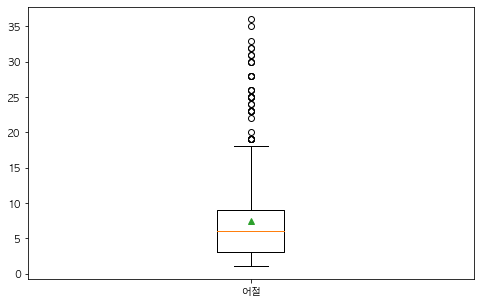

In [7]:
# boxplot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.boxplot(len_data, labels=['어절'], showmeans=True)
plt.show()

**boxplot에서 이상치가 너무 많아 보여서 20 이상의 모두를 제거하는 게 조금 주저된다.**

In [14]:
print('전체 수:', len(len_data))
print('결측치 수:', sum(np.array(len_data) > 20))

전체 수: 500
결측치 수: 30


### 어절 단위 histogram으로 분포 확인

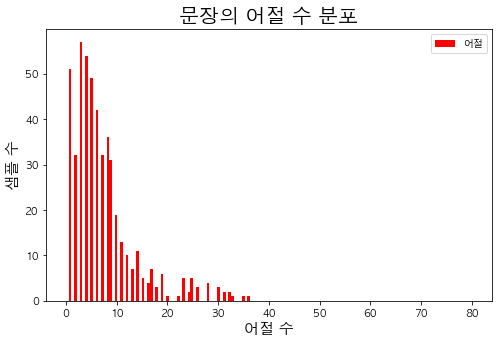

In [23]:
plt.figure(figsize=(8,5))
plt.hist(len_data, bins=150, range=[0, 80], 
         facecolor='r', density=False, label='어절')
plt.title('문장의 어절 수 분포', fontsize=20)
plt.legend()
plt.xlabel('어절 수', fontsize=15)
plt.ylabel('샘플 수', fontsize=15)
plt.show()

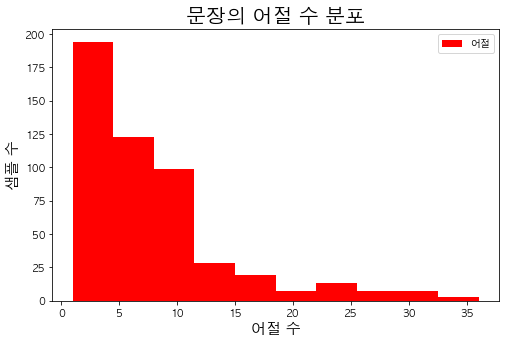

In [21]:
plt.figure(figsize=(8,5))
plt.hist(len_data, 
         facecolor='r', density=False, label='어절')
plt.title('문장의 어절 수 분포', fontsize=20)
plt.legend()
plt.xlabel('어절 수', fontsize=15)
plt.ylabel('샘플 수', fontsize=15)
plt.show()

**30 중반까지 데이터가 뻗어 있다. boxplot에 의해 18 이상이 이상치로 나왔지만, 그건 너무 가혹하고, 30정도로 끊으면 어떨까 생각해 본다.**

## 형태소 분리
- **(주의사항**)빈도 분석에서는 단어가 몇 번 나왔는지 명확히 봐야 하기 때문에 <u>**eomi=True**</u>를 해서 단어의 뜻이 명확하게 또는 단어가 똑 떨어지게 만들어 줘야 한다.
- 영어처럼 만들고 시작한다. 왜?
    - 영어는 관사 빼고는 어근만 가지고 있다.
    - 형태소 분석에서 pos=[NNP, NNG, VV, VA, IC, XR, MAG, MAJ, MM]를 해서 어근만 뽑아내고, 이를 다시 string으로 만든다.
    - 그럼 영어랑 똑같다. 
- 이렇게 되면 영어에서 사용하는 프로세스를 그대로 사용할 수 있다.
- 형태소 분석기의 역할은 여기서 끝난다.

### sample data 형태소 분리

In [26]:
# sample data 1개만 해본다.
import rhinoMorph
rn = rhinoMorph.startRhino()

sample_morphed = rhinoMorph.onlyMorph_list(rn, 
                    data[0][1], pos=['NNP', 'NNG',
                    'VV', 'VA', 'IC', 'XR', 'MM',
                    'MAJ', 'MAG'], eomi=True)
print('sample data:', sample_morphed)
print('joined sample data:', ' '.join(sample_morphed))

filepath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages
classpath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


### 전체 데이터 형태소 분석 후 원본 포맷으로 저장

In [34]:
# 전체 데이터 형태소 분석
whole_morphed = []
whole_text = 'ID'+ '\t' + 'Sentence' + '\t' + 'label' + '\n'
for dat in data:
    morphed = rhinoMorph.onlyMorph_list(rn, dat[1],
                            pos=['NNG', 'NNP', 'VV', 
                            'VA', 'IC', 'XR', 'MM', 
                            'MAJ', 'MAG'], eomi=True)
    joined_morphed = ' '.join(morphed)
    whole_morphed.append(joined_morphed)
    
    if joined_morphed:
        whole_text += dat[0] + '\t' + joined_morphed + '\t' + dat[1] + '\n'
print(len(whole_morphed))
write_data(whole_text, 'ratings_morphed_test.txt', encoding=encoding)

500


In [35]:
!ls

0_Java_JPype_rhinoMorph_installation.ipynb
1_1_practice.ipynb
1_morph_analysis_using_rhino.ipynb
2_morph_analysis_using_konlpy.ipynb
3_frequency_analysis.ipynb
Package_Pypi
ex4_including_only_geumyung.csv
ex5_sentence_keyword.csv
noun_금융규제운영규정.csv
pytest
ratings_morphed_test.txt
verbs_금융규제운영규정.csv


## 빈도 구하기

###  영어처럼 만든 txt 파일 데이터 로딩하기

In [40]:
data = read_data('ratings_morphed_test.txt', encoding=encoding)

data_text = [dat[1] for dat in data]
data_label = [dat[2] for dat in data]

### 어절 길이 파악하기

In [41]:
# 어절 길이 계산. 처음에 마땅한 분석 기준이 없을 때는 문장을 
# 어절 단위로 잘라서 그 개수를 세는 방법으로 시작해 보자.

len_data = []
for d in data:
    len_data.append(len(d[1].split()))
print(f'첫 문장 어절 길이: {len_data[0]}')

# 통계분석
import numpy as np
print(f'text length 최대: {np.max(len_data)}')
print(f'text length 최소: {np.min(len_data)}')
print(f'text length 평균: {np.mean(len_data)}')
print(f'text length 표준편차: {np.std(len_data)}')
print(f'text length 중간값: {np.median(len_data)}')
print(f'text length 1사분위: {np.percentile(len_data, 25)}')
print(f'text length 3사분위: {np.percentile(len_data, 75)}')
print(f'text length 95%: {np.percentile(len_data, 95)}')

첫 문장 어절 길이: 8
text length 최대: 38
text length 최소: 1
text length 평균: 8.935353535353535
text length 표준편차: 7.291053229694944
text length 중간값: 7.0
text length 1사분위: 4.0
text length 3사분위: 11.0
text length 95%: 26.0


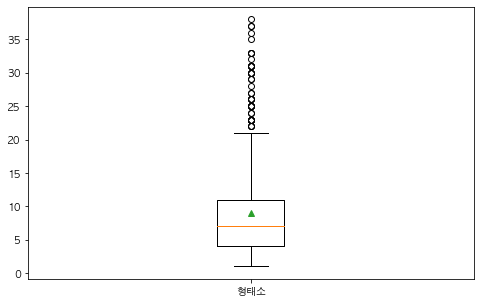

In [43]:
# boxplot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.boxplot(len_data, labels=['형태소'], showmeans=True)
plt.show()

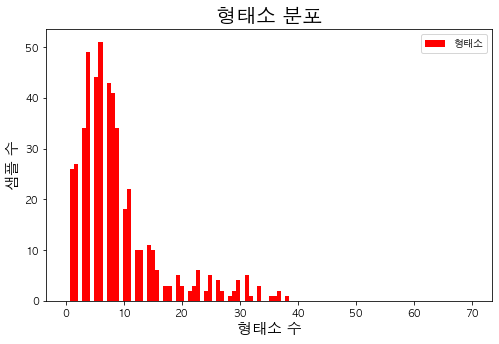

In [46]:
plt.figure(figsize=(8,5))
plt.hist(len_data, bins=100, range=[0, 70], 
         facecolor='r', density=False, label='형태소')
plt.title('형태소 분포', fontsize=20)
plt.legend()
plt.xlabel('형태소 수', fontsize=15)
plt.ylabel('샘플 수', fontsize=15)
plt.show()

### (번외) 클래스 Counter 다뤄보기

In [49]:
from collections import Counter
count = Counter(['여름', '봄', '딸기', '과일', '봄', '딸기'
                 , '봄'])
result = count.most_common(2)
print('count', count)
print('result', result)
print('result[0]', result[0])
print('result[0][0]', result[0][0])
print('result[0][1]', result[0][1])

count Counter({'봄': 3, '딸기': 2, '여름': 1, '과일': 1})
result [('봄', 3), ('딸기', 2)]
result[0] ('봄', 3)
result[0][0] 봄
result[0][1] 3


In [50]:
new_arr = np.array(result)
new_arr

array([['봄', '3'],
       ['딸기', '2']], dtype='<U21')

### 빈도 구하기 - 단어 분리

In [53]:
# data_text = [dat[1] for dat in data]
# data_label = [dat[2] for dat in data]

# 이건 잘못된 예시

text_count = Counter(data_text) # 이렇게 하면 문장전체를 두고 카운트를 한다.
text_count.most_common(3)

[('굿', 3), ('재미있다', 2), ('최고', 2)]

In [55]:
# 이건 좋은 예시
mergedText = ' '.join(data_text)
mergedTextList = mergedText.split()

text_count = Counter(mergedTextList)
text_count.most_common(5)

[('영화', 175), ('보다', 127), ('하다', 102), ('없다', 66), ('ㅋㅋ', 61)]

### 빈도 구하기 - 불용어 제거
 - 실질형태소 중 불용어 등록 및 제거(국립국어원 말뭉치 중 고빈도 어휘 선별)

In [70]:
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", 
                "사람", "이", "보다", " 한", "때", "년", "같다", "대하다", 
                "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
                " 받다", "그렇다", "알다", "사회", "더", "그녀", "문제", 
                "오다", "그리고", "크다", "속"]
mergedTextList_no_stopwards = [text for text in mergedTextList 
                               if text not in stopwords_ko]
print(len(mergedTextList))
mergedTextList = mergedTextList_no_stopwards
print(len(mergedTextList))

4423
3849


### 빈도 구하기 -Counter 사용


In [72]:
wordinfo = Counter(mergedTextList)
# print('wordinfo:', wordinfo)

### sorted 연습
- 새로운 객체를 반환함. 원 데이터를 훼손 시키지 않음.
- 반면, 메소드 sort()는 원데이터를 훼손시키므로 가능한 sorted 내장함수를 사용할 것. 
- 여기서 연습하고자 하는 것은, dict()의 key와 value를 내림차순으로 정렬하려고 해.
- 이게 쉽지 않은게 dict()는 순서가 없기 때문에 정렬하기가 쉽지 않아.
- key와 value를 분리하는 건 쉽지만, 분리한 다음 정렬하는 건 더 어려워.
- **이걸 해결해 주는 게 함수 sorted() 인데, 특히 key를 정렬할 때, value의 크기를 보고 정렬해야 함으로 이때 key=dict.get을 사용해야 해. 이거 엄청 중요함.**

In [76]:
sample = {'여름':100, '과일':200, '딸기':300}

print(sorted(sample))
print(sorted(sample, reverse=True))
print(sorted(sample, key=sample.get, reverse=True))
print(sorted(sample.values(), reverse=True))

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[300, 200, 100]


### bar 그래프 그리기
- bar 그래프에서 중요한 것은 모든 항목을 다 그릴 필요 없다는 것.
- 왜냐하면 상위 몇개, 하위 몇개, 이렇게 궁금한거지 모든 요소의 정보가 더 필요한 것 아님.

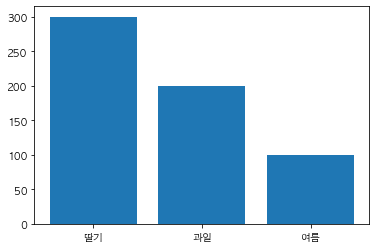

In [84]:
# bar 그래프 그리기1

wordinfo_sample = Counter(sample)
sorted_keys_sample = sorted(wordinfo_sample, key=wordinfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordinfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
# plt.bar(range(len(wordinfo_sample)), sorted_values_sample)
# plt.xticks(range(len(wordinfo_sample)), sorted_keys_sample)
plt.bar(sorted_keys_sample, sorted_values_sample)
plt.show()

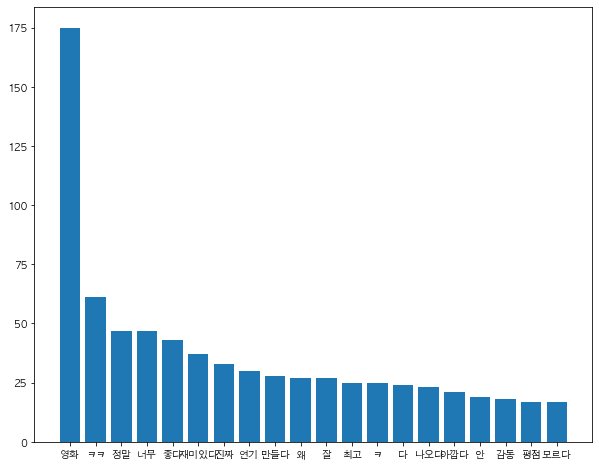

In [87]:
# bar 그래프 그리기2
# 앞에서 20개까지만 출력. 전체를 다 그리면 알아보지도 못할 뿐더러 우리의 관심사도 아님.

sorted_keys = sorted(wordinfo, key=wordinfo.get, reverse=True)
sorted_values = sorted(wordinfo.values(), reverse=True)

numlim = 20
plt.figure(figsize=(10,8))
plt.bar(sorted_keys[:numlim], sorted_values[:numlim])
plt.show()


**영화는 빈도수가 많지만 우리에게 그 어떤 정보도 주지 못한다. 왜. 영화리뷰인거 다 아는데.**

### Word Cloud
- font_path = 'Users/jsha/Library/Fonts/malgun.ttf'
- font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
- font_path = 'AppleGothic'
- font_path = 'malgun'

- mac에서는 저 path를 어떻게 찾냐면, 맥 os 내의 font book으로 검색해서 들어가면 돼.
- windows는 좀 정리하자. 그림 그릴 때 중요한 요소니까.

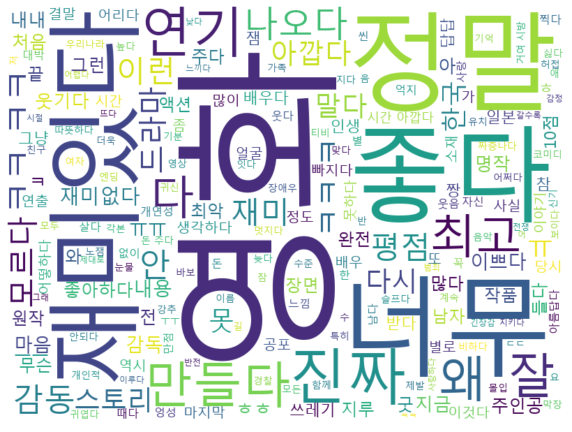

In [100]:
import matplotlib.pyplot as plt

linedata = ' '.join(mergedTextList)
# print(linedata)

try: 
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

cloud = WordCloud(font_path='malgun', 
                  width=800, height=600, 
                  background_color='white').generate(linedata)
plt.figure(figsize=(10,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
# 불용어에 '영화'를 제거하고 해보자.


3849
3674


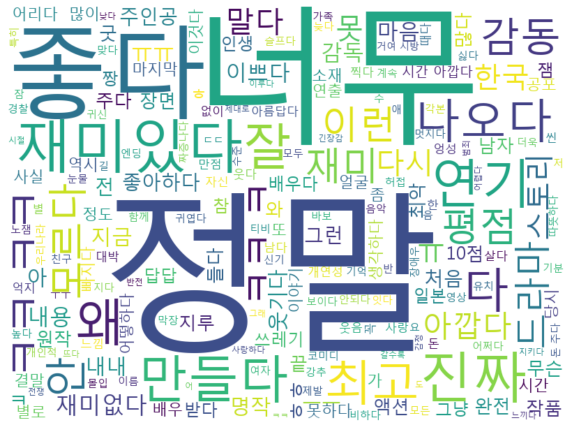

In [102]:
stopwords_ko = ["영화", "하다", "있다", "되다", "그", "않다", "없다", "나", "말", 
                "사람", "이", "보다", " 한", "때", "년", "같다", "대하다", 
                "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
                " 받다", "그렇다", "알다", "사회", "더", "그녀", "문제", 
                "오다", "그리고", "크다", "속"]
mergedTextList_no_stopwards = [text for text in mergedTextList 
                               if text not in stopwords_ko]
print(len(mergedTextList))
mergedTextList = mergedTextList_no_stopwards
print(len(mergedTextList))

import matplotlib.pyplot as plt

linedata = ' '.join(mergedTextList)
# print(linedata)

try: 
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

cloud = WordCloud(font_path='malgun', 
                  width=800, height=600, 
                  background_color='white').generate(linedata)
plt.figure(figsize=(10,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud with mask

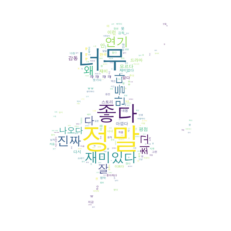

In [106]:
import os
import numpy as np
from PIL import Image

path = os.getcwd() + '/pytest/'
alice_mask = np.array(Image.open(os.path.join(path, 'alice.png')))

cloud = WordCloud(font_path='AppleGothic', width=800, height=600,
                 background_color='white', mask=alice_mask).generate(linedata)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

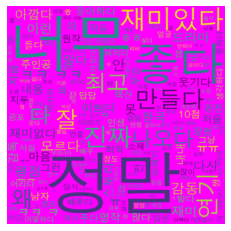

In [111]:
import os
import numpy as np
from PIL import Image

path = os.getcwd() + '/pytest/'
sky_mask = np.array(Image.open(os.path.join(path, 'sky.jpeg')))

cloud = WordCloud(font_path='AppleGothic', width=800, height=600,
                 background_color='magenta', mask=sky_mask).generate(linedata)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()